In [1]:
import pandas as pd 
import numpy as np

<h1>Feature Engineering<h1/>


In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


**Checking is there any null value**

In [6]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
df.bmi.head(6)

0    36.6
1     NaN
2    32.5
3    34.4
4    24.0
5    29.0
Name: bmi, dtype: float64

In [8]:
df.bmi.fillna(df.bmi.mean(),inplace=True)

In [9]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [10]:
df.bmi.head(6)

0    36.600000
1    28.893237
2    32.500000
3    34.400000
4    24.000000
5    29.000000
Name: bmi, dtype: float64

In [11]:
df['bmi'] = df.bmi.round(decimals=1)

In [12]:
df.bmi.head(6)

0    36.6
1    28.9
2    32.5
3    34.4
4    24.0
5    29.0
Name: bmi, dtype: float64

In [13]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
               print(f'{column}: {df[column].unique()}') 


In [14]:
print_unique_col_values(df)

gender: ['Male' 'Female' 'Other']
ever_married: ['Yes' 'No']
work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type: ['Urban' 'Rural']
smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


**From above visulization I understand the my data is unblanced**

In [15]:
count_0 = (df['stroke'] == 0).sum()
count_1 = (df['stroke'] == 1).sum()
print("Count of 0:", count_0)
print("Count of 1:", count_1)

Count of 0: 4861
Count of 1: 249


<Axes: ylabel='count'>

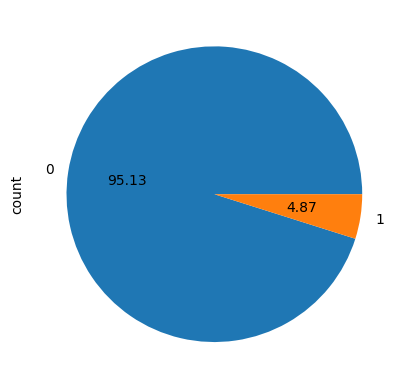

In [16]:
df.stroke.value_counts().plot.pie(autopct='%.2f')


**Lets try to fix it latter**

**<h3>In my opinion my dataset is too small so make it little bit bigger I use another dataset<h3/>**

In [17]:
df1 = pd.read_csv("Stroke data.csv")
df1.sample(6)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2554,21762,Male,5,0,0,No,children,Rural,100.98,19.0,NaN,0
7824,66028,Female,2,0,0,No,children,Rural,76.06,18.1,NaN,0
309,2702,Female,57,0,0,Yes,Private,Rural,65.91,28.2,formerly smoked,0
7760,65553,Female,8,0,0,No,children,Rural,98.32,23.3,NaN,0
1540,12832,Male,12,0,0,No,children,Urban,81.54,16.5,NaN,0
5605,47622,Male,78,0,1,Yes,Self-employed,Urban,228.70,34.0,formerly smoked,0


In [18]:
count_0 = (df1['stroke'] == 0).sum()
count_1 = (df1['stroke'] == 1).sum()
print("Count of 0:", count_0)
print("Count of 1:", count_1)

Count of 0: 8350
Count of 1: 250


**Above dataset also have unblanced dataset :(**<br>
**But we can make it better :)**

In [19]:
df1.isnull().sum()

id                      0
gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   226
smoking_status       3585
stroke                  0
dtype: int64

In [20]:
df1.bmi.fillna(df1.bmi.mean(),inplace=True)
df1.bmi = df1.bmi.round(decimals=1)

In [21]:
df1.isnull().sum()

id                      0
gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                     0
smoking_status       3585
stroke                  0
dtype: int64

**And for smoking_status I work upon it sometime latter**

**Now lets concat two dataframe**

In [22]:
df_main = pd.concat([df,df1])

In [23]:
df_main.shape

(13710, 12)

In [24]:
df_main.sample(8)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
606,7446,Male,44.0,0,0,Yes,Private,Urban,83.51,31.2,never smoked,0
4952,16245,Male,51.0,1,0,Yes,Self-employed,Rural,211.83,56.6,never smoked,0
2430,63912,Female,77.0,0,0,Yes,Govt_job,Rural,167.59,34.3,formerly smoked,0
6030,50978,Female,31.0,0,0,Yes,Govt_job,Urban,94.40,39.8,formerly smoked,0
7525,63457,Female,78.0,0,1,No,Self-employed,Urban,110.78,22.9,never smoked,0
8310,70466,Male,3.0,0,0,No,children,Rural,94.72,19.7,NaN,0
4786,40626,Female,3.0,0,0,No,children,Urban,86.20,15.4,NaN,0
1075,3509,Male,47.0,1,0,Yes,Private,Urban,110.25,44.3,never smoked,0


**Now lets handle the smoking_status null value and also unknown value**

<Axes: xlabel='smoking_status'>

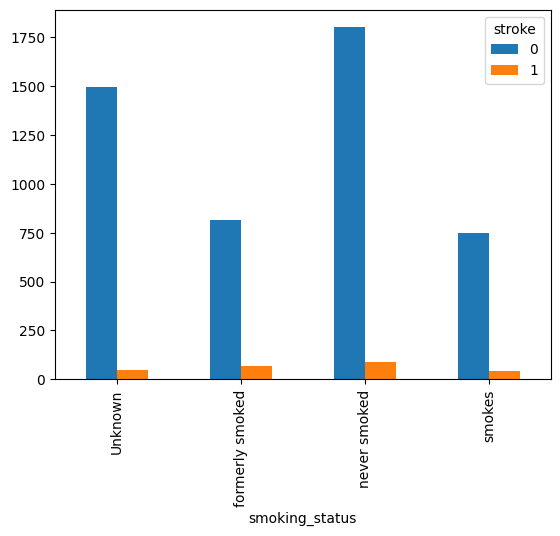

In [25]:
pd.crosstab(df.smoking_status,df.stroke).plot(kind='bar')

<Axes: xlabel='smoking_status'>

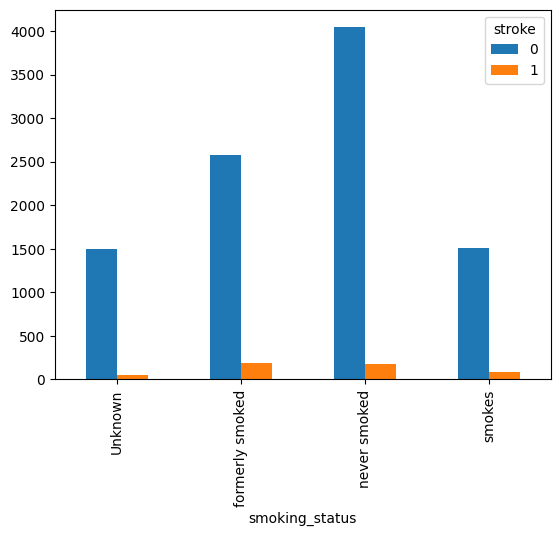

In [26]:
pd.crosstab(df_main.smoking_status,df_main.stroke).plot(kind='bar')

In [27]:
df_main.loc[(df_main['smoking_status'] == 'Unknown') & (df_main['stroke'] == 0), 'smoking_status'] = 'never smoked'
df_main.loc[df_main['smoking_status'] == 'Unknown', 'smoking_status'] = 'formerly smoked'

In [28]:
df_main.sample(8)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3309,27958,Male,3.0,0,0,No,children,Rural,100.97,15.2,NaN,0
8207,69404,Male,73.0,0,0,Yes,Govt_job,Rural,76.45,28.7,formerly smoked,0
5668,48109,Female,79.0,0,1,Yes,Private,Rural,88.51,24.5,never smoked,0
846,12270,Male,71.0,0,0,Yes,Govt_job,Rural,186.45,26.7,never smoked,0
7917,66794,Female,44.0,0,0,Yes,Govt_job,Rural,81.13,34.1,never smoked,0
2299,19377,Male,5.0,0,0,No,children,Urban,126.45,14.6,NaN,0
3858,32535,Male,13.0,0,0,No,children,Rural,85.40,26.3,NaN,0
2153,2868,Female,54.0,0,0,Yes,Govt_job,Rural,102.61,32.4,never smoked,0


<Axes: xlabel='smoking_status'>

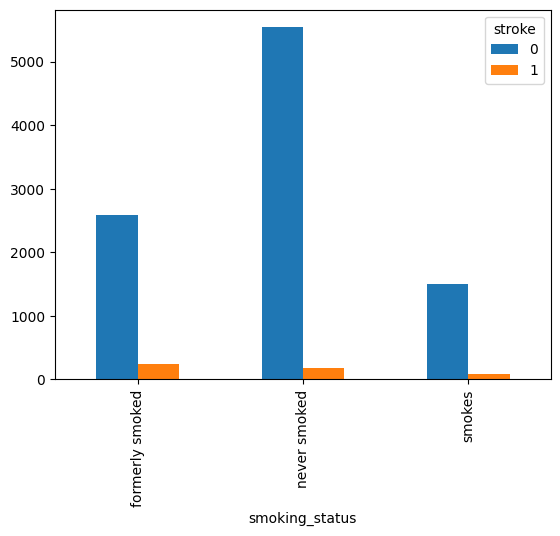

In [29]:
pd.crosstab(df_main.smoking_status,df_main.stroke).plot(kind='bar')

**Above visulization is lot better than before**

**Now Handle the null value in this column I use same code**

In [30]:
replacement_dict = {0: 'never smoked', 1: 'formerly smoked'}
df_main['smoking_status'] = df_main['smoking_status'].fillna(df_main['stroke'].map(replacement_dict))

In [31]:
df_main.sample(8)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
8077,68315,Male,12.0,0,0,No,children,Rural,69.23,15.9,never smoked,0
5922,50070,Female,62.0,1,0,Yes,Self-employed,Rural,261.67,43.0,formerly smoked,0
2892,33876,Male,10.0,0,0,No,children,Urban,87.09,14.3,never smoked,0
1636,64541,Male,23.0,0,0,Yes,Private,Urban,115.83,25.3,never smoked,0
210,1821,Female,54.0,0,0,Yes,Private,Urban,85.22,50.2,never smoked,0
8048,68074,Male,54.0,0,0,Yes,Private,Rural,100.47,50.2,formerly smoked,0
4112,34995,Female,77.0,0,0,Yes,Private,Rural,115.29,32.9,formerly smoked,0
7254,61146,Female,2.0,0,0,No,children,Rural,77.15,21.1,never smoked,0


<Axes: xlabel='smoking_status'>

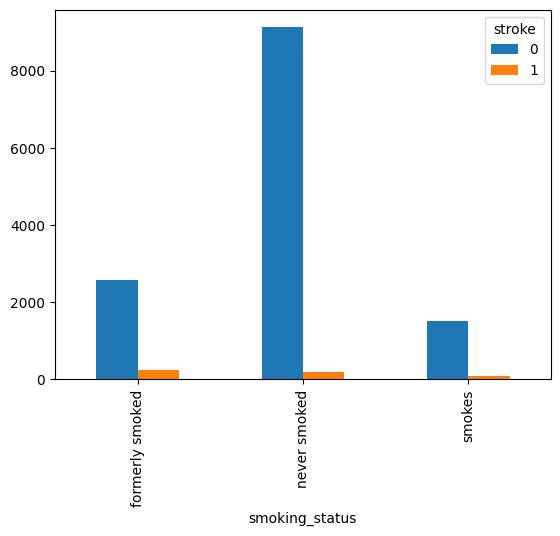

In [32]:
pd.crosstab(df_main.smoking_status,df_main.stroke).plot(kind='bar')

In [33]:
df_main.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

**My dataset much better :))**

**Now as we know machine don't understand the object we need to change to integer value**

In [34]:
print_unique_col_values(df_main)

gender: ['Male' 'Female' 'Other']
ever_married: ['Yes' 'No']
work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type: ['Urban' 'Rural']
smoking_status: ['formerly smoked' 'never smoked' 'smokes']


In [35]:
df_main.drop(df_main[df_main['gender'] == 'Other'].index, inplace=True)

In [36]:
df_ds = df_main.copy()

In [37]:
df_ds.head(4)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.9,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1


In [38]:
df_ds['hypertension'] =  df_ds['hypertension'].replace({1:'Yes', 0:'No'})
df_ds['heart_disease'] =  df_ds['heart_disease'].replace({1:'Yes', 0:'No'})
df_ds['stroke'] =  df_ds['stroke'].replace({1:'Yes', 0:'No'})

In [39]:
df_ds.to_csv("Dash_B.csv")

**So from above if there only 2 object than we just simple change into 0 and 1 and for other we use get_dummy variables**

In [40]:
df_main['ever_married'] =  df_main['ever_married'].replace({'Yes': 1, 'No': 0})
df_main['Residence_type'] =  df_main['Residence_type'].replace({'Urban': 1, 'Rural': 0})
df_main['gender'] =  df_main['gender'].replace({'Male':1, 'Female':0})

In [41]:
df_main.sample(8)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3504,10651,1,54.0,1,0,1,Govt_job,0,100.12,32.3,formerly smoked,0
4042,59054,1,17.0,0,0,0,Private,0,77.79,23.6,never smoked,0
172,67432,0,60.0,0,0,1,Private,1,97.43,26.4,smokes,1
4421,5647,0,18.0,0,0,0,Private,1,99.01,25.5,formerly smoked,0
6297,53192,1,1.0,0,0,0,children,0,127.44,15.6,never smoked,0
6695,56410,1,1.0,0,0,0,children,1,81.42,13.5,never smoked,0
6770,56963,0,12.0,0,0,0,children,0,58.58,25.0,never smoked,0
4087,34759,0,13.0,0,0,0,Private,0,102.42,30.2,never smoked,0


In [42]:
print_unique_col_values(df_main)

work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
smoking_status: ['formerly smoked' 'never smoked' 'smokes']


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [44]:
# Select the columns for which you want to create dummy variables
columns_for_dummies = ['work_type', 'smoking_status']

# Get dummy variables for the selected columns
dummy_df = pd.get_dummies(df_main[columns_for_dummies], prefix='',drop_first=True)
dummy_df.columns = dummy_df.columns.str.replace('_', '')

# Concatenate the dummy variables with the original DataFrame
df_main = pd.concat([df_main, dummy_df], axis=1)

# Drop the original columns for which dummy variables were created
df_main = df_main.drop(columns=columns_for_dummies)
df_main.head(8)

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,Neverworked,Private,Self-employed,children,never smoked,smokes
0,9046,1,67.0,0,1,1,1,228.69,36.6,1,False,True,False,False,False,False
1,51676,0,61.0,0,0,1,0,202.21,28.9,1,False,False,True,False,True,False
2,31112,1,80.0,0,1,1,0,105.92,32.5,1,False,True,False,False,True,False
3,60182,0,49.0,0,0,1,1,171.23,34.4,1,False,True,False,False,False,True
4,1665,0,79.0,1,0,1,0,174.12,24.0,1,False,False,True,False,True,False
5,56669,1,81.0,0,0,1,1,186.21,29.0,1,False,True,False,False,False,False
6,53882,1,74.0,1,1,1,0,70.09,27.4,1,False,True,False,False,True,False
7,10434,0,69.0,0,0,0,1,94.39,22.8,1,False,True,False,False,True,False


In [45]:
bool_columns = df_main.select_dtypes(include=bool).columns
df_main[bool_columns] = df_main[bool_columns].astype(int)
df_main.head(8)

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,Neverworked,Private,Self-employed,children,never smoked,smokes
0,9046,1,67.0,0,1,1,1,228.69,36.6,1,0,1,0,0,0,0
1,51676,0,61.0,0,0,1,0,202.21,28.9,1,0,0,1,0,1,0
2,31112,1,80.0,0,1,1,0,105.92,32.5,1,0,1,0,0,1,0
3,60182,0,49.0,0,0,1,1,171.23,34.4,1,0,1,0,0,0,1
4,1665,0,79.0,1,0,1,0,174.12,24.0,1,0,0,1,0,1,0
5,56669,1,81.0,0,0,1,1,186.21,29.0,1,0,1,0,0,0,0
6,53882,1,74.0,1,1,1,0,70.09,27.4,1,0,1,0,0,1,0
7,10434,0,69.0,0,0,0,1,94.39,22.8,1,0,1,0,0,1,0


 <h1>Now above dataset looks great<h1/>

<Axes: ylabel='count'>

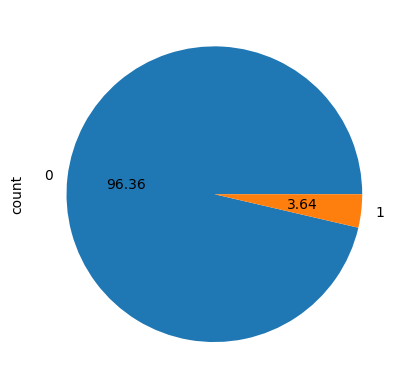

In [46]:
df_main.stroke.value_counts().plot.pie(autopct='%.2f')

**Now lets try to balanced my dataset**

***So we try out both undersampling and oversampling. And I choose which ever give me the accuracy and f1 score etc...***

<h2>Oversampling<h2/>

In [47]:
X = df_main.drop(columns="stroke")
y = df_main.stroke

In [48]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

stroke
1    13209
0    13209
Name: count, dtype: int64

In [49]:
y_sm.sample(4)

5369     0
4966     0
13338    0
10486    0
Name: stroke, dtype: int64

In [50]:
X_sm.sample(4)

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,Neverworked,Private,Self-employed,children,never smoked,smokes
12891,65703,1,14.000000,0,0,0,0,64.660000,26.50000,0,0,1,0,1,0
15368,54840,1,70.336636,0,0,1,0,186.255232,29.08713,0,0,1,0,0,0
4795,67159,1,73.000000,1,0,0,1,71.290000,37.70000,0,0,0,0,1,0
24420,58222,0,56.211890,1,0,1,0,190.738752,35.43468,0,0,0,0,0,0


In [51]:
X_sm[['avg_glucose_level','bmi']] = X_sm[['avg_glucose_level','bmi']].round(decimals=2)
X_sm.age = X_sm.age.astype(int)

In [52]:
X_sm.drop(columns='id',inplace=True)

In [53]:
X_sm.head(8)

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,Neverworked,Private,Self-employed,children,never smoked,smokes
0,1,67,0,1,1,1,228.69,36.6,0,1,0,0,0,0
1,0,61,0,0,1,0,202.21,28.9,0,0,1,0,1,0
2,1,80,0,1,1,0,105.92,32.5,0,1,0,0,1,0
3,0,49,0,0,1,1,171.23,34.4,0,1,0,0,0,1
4,0,79,1,0,1,0,174.12,24.0,0,0,1,0,1,0
5,1,81,0,0,1,1,186.21,29.0,0,1,0,0,0,0
6,1,74,1,1,1,0,70.09,27.4,0,1,0,0,1,0
7,0,69,0,0,0,1,94.39,22.8,0,1,0,0,1,0


In [54]:
df_ds.head(8)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.6,formerly smoked,Yes
1,51676,Female,61.0,No,No,Yes,Self-employed,Rural,202.21,28.9,never smoked,Yes
2,31112,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.5,never smoked,Yes
3,60182,Female,49.0,No,No,Yes,Private,Urban,171.23,34.4,smokes,Yes
4,1665,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.0,never smoked,Yes
5,56669,Male,81.0,No,No,Yes,Private,Urban,186.21,29.0,formerly smoked,Yes
6,53882,Male,74.0,Yes,Yes,Yes,Private,Rural,70.09,27.4,never smoked,Yes
7,10434,Female,69.0,No,No,No,Private,Urban,94.39,22.8,never smoked,Yes


<h2>Undersampling<h2/>

**After check the Classification Report I don't need to do undersampling :)**

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=10)

**Now lets train our model**

In [57]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [58]:
model_params = {

    'knn': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [1, 5, 10, 15, 20, 30]
        }
    },
    'random_forest': {

        'model': RandomForestClassifier(),
        'params': { 
            'n_estimators': [1, 10, 20, 30, 40, 50, 60, 70, 90, 100, 110, 120]
        },
    },
    'l_g': {
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params': {
            'C': [1, 5, 10],
        }
    },
    'GussNB': {
        'model': GaussianNB(),
        'params': {}
    },
    'mul_NB': {
        'model': MultinomialNB(),
        'params': {}
    },
    'dtc': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy'],
            'splitter': ['best', 'random']
        }
    }
}


In [59]:
cross_val_score(RandomForestClassifier(),X_train, y_train,cv=5)

array([0.97837253, 0.97864288, 0.97593294, 0.9770146 , 0.98134127])

**Form below see svm don't work properly and take so much time so i remove it in grdsearchcv :)**

cross_val_score( svm.SVC(gamma='auto',C=10),X_train, y_train,cv=5)

In [60]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
scores = []

for model_names,mp in model_params.items():
    clf = GridSearchCV(mp['model'],mp['params'],cv=10,return_train_score=False)
    clf.fit(X_sm, y_sm)
    scores.append({
        'model': model_names,
        'best_score': clf.best_score_,
        'best_params':clf.best_params_
    })
df_m = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_m

,model,best_score,best_params
0,knn,0.982853,{'n_neighbors': 1}
1,random_forest,0.991029,{'n_estimators': 100}
2,l_g,0.866418,{'C': 1}
3,GussNB,0.768721,{}
4,mul_NB,0.771332,{}
5,dtc,0.983193,"{'criterion': 'entropy', 'splitter': 'random'}"


**Random Forest give me 98% of accuracy so i choose this algo**

In [61]:
cross_val_score(RandomForestClassifier(n_estimators=70),X_train, y_train,cv=5)

array([0.97675047, 0.97972425, 0.97647377, 0.97376961, 0.98215251])

In [62]:
cross_val_score(RandomForestClassifier(n_estimators=80),X_train, y_train,cv=5)

array([0.97620979, 0.97864288, 0.9770146 , 0.97431044, 0.98242293])

In [63]:
cross_val_score(RandomForestClassifier(n_estimators=90),X_train, y_train,cv=5)

array([0.97810219, 0.97945391, 0.97755544, 0.97620335, 0.98269335])

In [64]:
cross_val_score(RandomForestClassifier(n_estimators=100),X_train, y_train,cv=5)

array([0.97593944, 0.9775615 , 0.97431044, 0.9753921 , 0.9818821 ])

In [65]:
rd_df = RandomForestClassifier(n_estimators=120)
rd_df.fit(X_train,y_train)
rd_df.score(X_test,y_test)

0.9862477920767095

In [66]:
y_prediction = rd_df.predict(X_test)
y_prediction

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [67]:
df_ds.head(8)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.6,formerly smoked,Yes
1,51676,Female,61.0,No,No,Yes,Self-employed,Rural,202.21,28.9,never smoked,Yes
2,31112,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.5,never smoked,Yes
3,60182,Female,49.0,No,No,Yes,Private,Urban,171.23,34.4,smokes,Yes
4,1665,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.0,never smoked,Yes
5,56669,Male,81.0,No,No,Yes,Private,Urban,186.21,29.0,formerly smoked,Yes
6,53882,Male,74.0,Yes,Yes,Yes,Private,Rural,70.09,27.4,never smoked,Yes
7,10434,Female,69.0,No,No,No,Private,Urban,94.39,22.8,never smoked,Yes


In [68]:
rows_to_display = [4947, 23139]
specific_rows = X_sm.loc[rows_to_display]
specific_rows

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,Neverworked,Private,Self-employed,children,never smoked,smokes
4947,0,31,0,0,1,1,117.31,28.40,0,1,0,0,1,0
23139,0,65,0,0,1,0,195.18,29.96,0,0,0,0,1,0


In [69]:
y_sm.sample(8)

1584     0
19442    1
21081    1
13912    1
25161    1
23168    1
6927     0
1261     0
Name: stroke, dtype: int64

In [70]:
def predict_stroke(gender,age,hypertension,heart_disease,ever_married,residence_type,avg_glucose_level,bmi,work_type,smoking_status): 
    hypertension = 1 if hypertension == 'yes' else 0
    heart_disease = 1 if heart_disease == 'yes' else 0
    ever_married = 1 if ever_married == 'yes' else 0   
    gender = 1 if gender == 'male' else 0   
    residence_type = 1 if residence_type == 'Urban' else 0

    work_type_index = np.where(X_sm.columns ==  work_type)[0]
    smoking_status_index = np.where(X_sm.columns ==  smoking_status)[0]
    
    x = np.zeros(len(X_sm.columns))

    x[0] = gender
    x[1] = age
    x[2] = hypertension
    x[3] = heart_disease
    x[4] = ever_married
    x[5] = residence_type
    x[6] = avg_glucose_level
    x[7] = bmi

    if work_type_index >= 0:
        x[work_type_index] = 1
    if smoking_status_index >= 0:
        x[smoking_status_index] = 1

    return rd_df.predict([x])[0]

predict_stroke(67,'No','Yes','Yes','Urban','228.69','36.6','Male','Private','formerly smoked')

In [71]:
predict_stroke('Female', 31, 'No', 'No', 'Yes', 'Urban', 117.31, 28.40, 'Private', 'never smoked')

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0

In [72]:
report = classification_report(y_test, y_prediction)
print(report)


              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3944
           1       0.98      0.99      0.99      3982

    accuracy                           0.99      7926
   macro avg       0.99      0.99      0.99      7926
weighted avg       0.99      0.99      0.99      7926



**See finaly my code working perfectly** :)))))

In [74]:
import pickle
filename = 'trained_model.sav'
pickle.dump(rd_df,open(filename,'wb'))